<a href="https://colab.research.google.com/github/kbotnen/pythonki_h25/blob/main/git_code/Pythonkurs%20-%2002%20-%20Tirsdag%20-%20Bildebehandling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/kbotnen/pythonki_h25/blob/main/bilder/Pythonkurs_Del_6_Bildebehandling.004.png?raw=1" alt="OpenCV logo" width="600">

<img src="https://github.com/kbotnen/pythonki_h25/blob/main/bilder/Pythonkurs_Del_6_Bildebehandling.002.png?raw=1" alt="Pixel illustration" width="600">

<img src="https://github.com/kbotnen/pythonki_h25/blob/main/bilder/Pythonkurs_Del_6_Bildebehandling.003.png?raw=1" alt="Color illustration" width="600">

In [1]:
import cv2 # pip install opencv-python-headless or conda install opencv
from matplotlib import pyplot as plt

In [2]:
bgr_image = cv2.imread("/content/git_data/topaz.jpg") # cv2 read in BGR format.

In [3]:
# Due to jupyter's architecture we can not use cv2.imshow() so we create a helper method to utilize pyplot.
def show_image(image, title):
    plt.imshow(image)
    plt.title(title)
    plt.show()

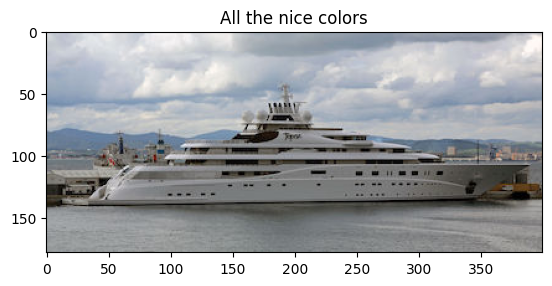

In [4]:
# Show the RGB image.
show_image(cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB), "All the nice colors")

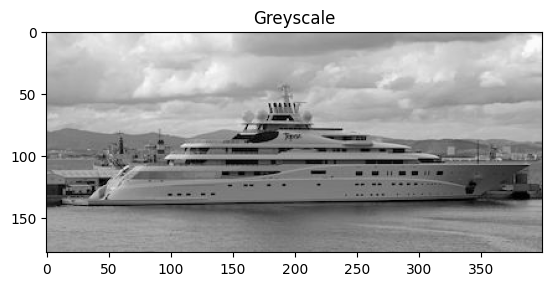

In [5]:
# Convert to grayscale for more efficient work.
# Do operations on grayscale are more efficient since there is less colors.
gray_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2GRAY) # First: Make it grayscale.
show_image(cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB), "Greyscale") # Third: View the result.

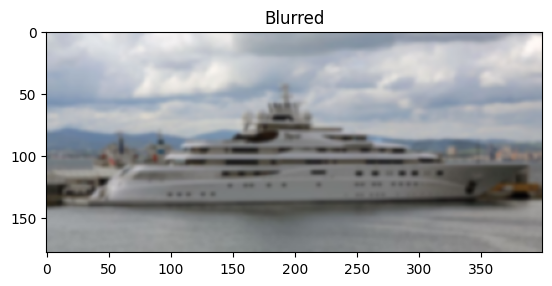

In [6]:
# Blur the image with Gaussian blur, a popular and relatively fast blur algorithm.
# We use a window of size 7px * 7px, which means that we average values in the window for blur effect.
# Larger window will result in more blur, but will be slower.
blurred_image = cv2.GaussianBlur(bgr_image, (7,7), 0)
show_image(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB), "Blurred")

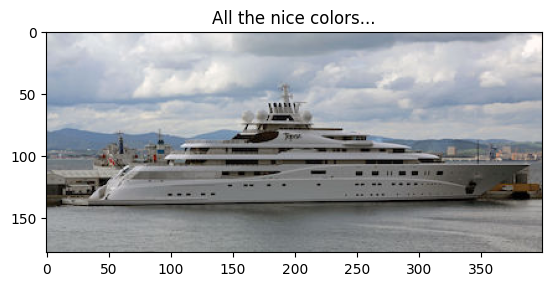

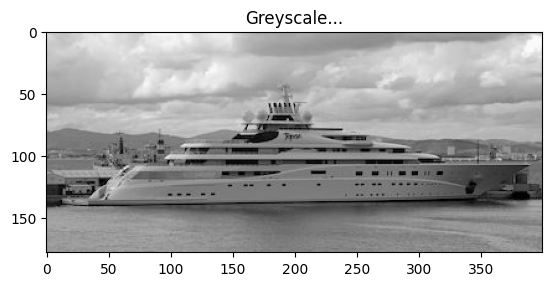

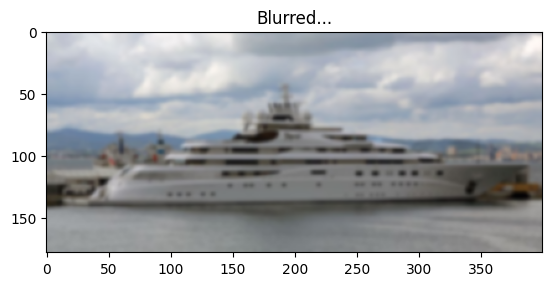

In [7]:
# All together now.
show_image(cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB), "All the nice colors...")
show_image(cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB), "Greyscale...")
show_image(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB), "Blurred...")

# Ansiktsgjenkjenkjenning med OpenCV

Haar Cascade er en ML objektgjenkjennings algoritme som er basert på en artikkel som ble publisert i "International Journal of Computer Vision" i 2001. Artikkelen var igjen basert på forskningsoppgaven deres "Rapid Object Detection using a Boosted Cascade of Simple Features".

Konseptet baserer seg på at man kan trene opp / finne mønstre som kan gjenbrukes senere. Man har et (eller mange bilder) av ansikt hvor bildene scannes etter mønstre som går igjen i alle bildene som er ansikt. Et mønster kan være hvordan forskjellige piksler står i forhold til hverandre, pikslenes skarphet og lysintensitet med mer. Disse kjennetegnene lagres som såkalte features, og for et ansikt kan vi ha rundt 6000 slike features. Ved hjelp av disse featurene kan vi da teste andre bilder, og om vi får treff på nok features så har vi funnet objektet vi leter etter.

Original paper: [https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf](https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf)

Flere datasett: [https://github.com/opencv/opencv/tree/master/data/haarcascades](https://github.com/opencv/opencv/tree/master/data/haarcascades)

<img src="https://github.com/kbotnen/pythonki_h25/blob/main/bilder/Pythonkurs_Del_6_Bildebehandling.005.png?raw=1" alt="Features illustration" width="600">

<img src="https://github.com/kbotnen/pythonki_h25/blob/main/bilder/Pythonkurs_Del_6_Bildebehandling.006.png?raw=1" alt="Cascade illustration" width="600">

<img src="https://github.com/kbotnen/pythonki_h25/blob/main/bilder/Pythonkurs_Del_6_Bildebehandling.007.png?raw=1" alt="Sliding window illustration" width="600">

In [8]:
# Create the haar cascade
cascPath = "/content/git_data/haarcascade_frontalface_default.xml" # Just an xml file that contains data about a face.
faceCascade = cv2.CascadeClassifier(cascPath) # Load the cascade into memory.

In [9]:
face_image = cv2.imread("/content/git_data/abba.png") # cv2 read in BGR format.
gray_image_face = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)

In [10]:
# The detectMultiScale function is a general function that detects objects.
# Since we are calling it on the face cascade, thats what it detects.
# gray_image_face = Our image, in grayscale.
# scaleFactor = Compensate for faces being near / far from the camera effect.
# minNeighbors = How many objects are detected near the current moving window before it declares the face found.
# minSize = The size of each window.
faces = faceCascade.detectMultiScale(
    gray_image_face,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags = cv2.CASCADE_SCALE_IMAGE
)
# The detected objects are returned as a list of rectangles.

In [11]:
print(type(faces))
print(faces)

<class 'numpy.ndarray'>
[[ 56  55  75  75]
 [168  70  66  66]
 [267  69  87  87]
 [354  78  74  74]]


In [12]:
# Iterate the list of faces and draw a rectangle around the faces.
for (x, y, w, h) in faces:
    cv2.rectangle(face_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

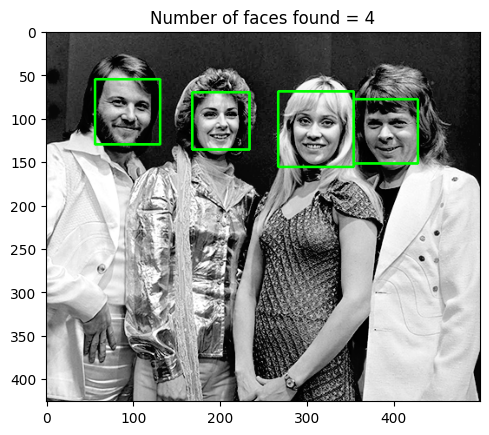

In [13]:
show_image(cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB), "Number of faces found = %s" % len(faces))

In [14]:
face_image_b = cv2.imread("/content/git_data/celebrities.png") # cv2 read in BGR format.
gray_image_face_b = cv2.cvtColor(face_image_b, cv2.COLOR_BGR2GRAY)

In [15]:
faces = faceCascade.detectMultiScale(
    gray_image_face_b,
    scaleFactor=1.1,
    minNeighbors=1,
    minSize=(30, 30),
    flags = cv2.CASCADE_SCALE_IMAGE
)

In [16]:
print(type(faces))
print(faces)

<class 'numpy.ndarray'>
[[202  21  33  33]
 [ 52   7  36  36]
 [159  10  33  33]
 [112  24  35  35]]


In [17]:
# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(face_image_b, (x, y), (x+w, y+h), (0, 255, 0), 1)

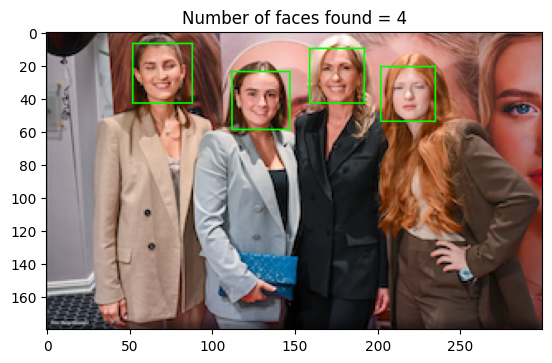

In [18]:
show_image(cv2.cvtColor(face_image_b, cv2.COLOR_BGR2RGB), "Number of faces found = %s" % len(faces))

Vi har nå jobbet med stillbilder, men det skal ikke mange ekstra linjer med kode til for å analysere videoer (som er en samling av stillbilder) på samme måten. Som nevnt er sanntidsbehandling hovedfokuset til OpenCV.